# Garment team productivity

In [70]:
import pandas as pd
import numpy as np

In [71]:
gData=pd.read_csv('/Users/shreya/Desktop/Python Datasets/Regression Datasets/garments.csv', encoding='latin')
print('Shape before deleting duplicate values:', gData.shape)

Shape before deleting duplicate values: (1197, 15)


In [72]:
gData=gData.drop_duplicates()
print('Shape After deleting duplicate values:', gData.shape)

gData.head()

Shape After deleting duplicate values: (1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [73]:
gData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [74]:
gData.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/31/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


array([[<AxesSubplot:title={'center':'actual_productivity'}>]],
      dtype=object)

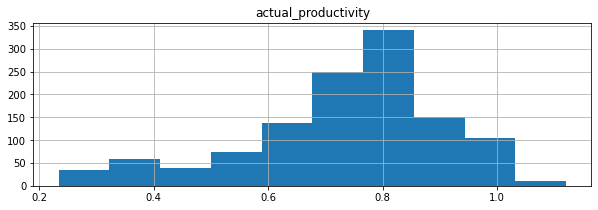

In [75]:
%matplotlib inline
gData.hist(['actual_productivity'], figsize=[10,3])

In [76]:
gData.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

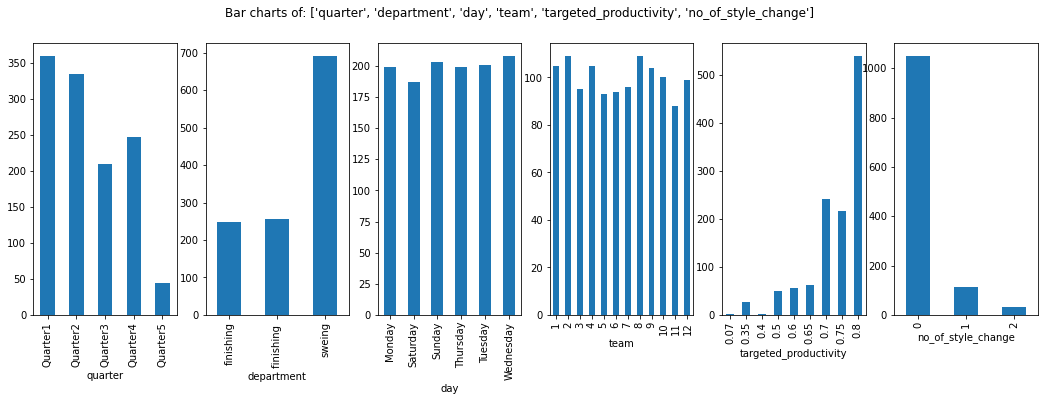

In [77]:
# Plotting multiple bar charts for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=gData, colsToPlot=['quarter', 'department','day','team','targeted_productivity','no_of_style_change'])

array([[<AxesSubplot:title={'center':'smv'}>,
        <AxesSubplot:title={'center':'wip'}>],
       [<AxesSubplot:title={'center':'over_time'}>,
        <AxesSubplot:title={'center':'incentive'}>],
       [<AxesSubplot:title={'center':'no_of_workers'}>, <AxesSubplot:>]],
      dtype=object)

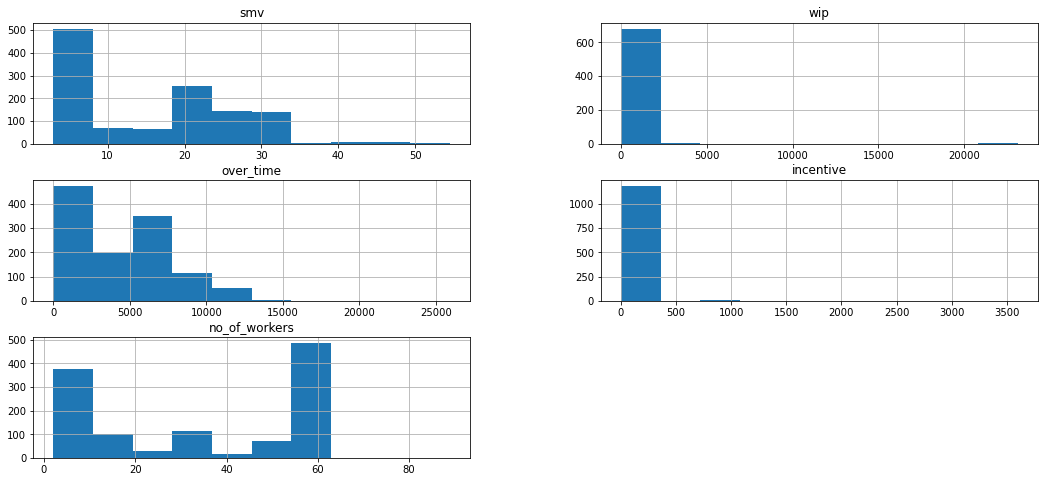

In [78]:
gData.hist(['smv', 'wip', 'over_time','incentive','no_of_workers'], figsize=(18,8))

<AxesSubplot:xlabel='no_of_workers', ylabel='actual_productivity'>

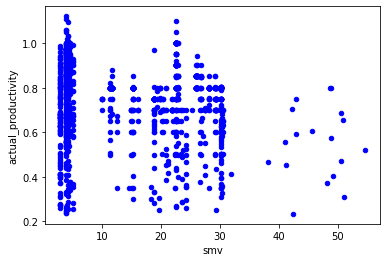

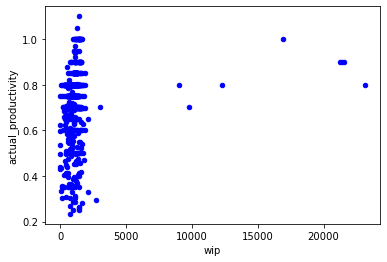

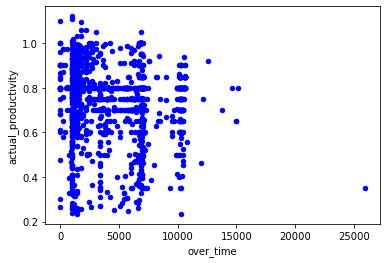

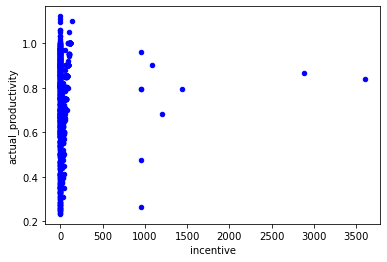

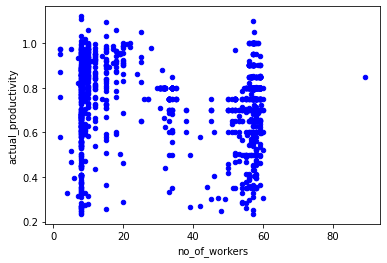

In [79]:
import matplotlib.pyplot as plt

# Generating multiple subplots
#fig, subPlot=plt.subplots(nrows=2, ncols=3, figsize=(18,5))


gData.plot.scatter(x='smv', y='actual_productivity', marker='o', color='blue')
gData.plot.scatter(x='wip', y='actual_productivity', marker='o', color='blue')
gData.plot.scatter(x='over_time', y='actual_productivity', marker='o', color='blue')
gData.plot.scatter(x='incentive', y='actual_productivity', marker='o', color='blue')
gData.plot.scatter(x='no_of_workers', y='actual_productivity', marker='o', color='blue')

In [80]:
gData[gData['no_of_workers']>80]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
355,1/21/2015,Quarter3,sweing,Wednesday,6,0.8,11.61,916.0,5760,75,0.0,0,0,89.0,0.850411


In [81]:
gData['no_of_workers'][gData['no_of_workers']>80]=60

<ipython-input-81-cd8d3f1eaad3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gData['no_of_workers'][gData['no_of_workers']>80]=60


In [82]:
gData[gData['wip']>15000]


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,2/2/2015,Quarter1,sweing,Monday,1,0.8,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
563,2/2/2015,Quarter1,sweing,Monday,2,0.8,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,2/2/2015,Quarter1,sweing,Monday,3,0.8,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
565,2/2/2015,Quarter1,sweing,Monday,10,0.8,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
569,2/2/2015,Quarter1,sweing,Monday,4,0.8,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393


In [83]:
gData[gData['over_time']>20000]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951


In [84]:
gData['over_time'][gData['over_time']>20000]=15000

<ipython-input-84-0dac6376a342>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gData['over_time'][gData['over_time']>20000]=15000


In [85]:
gData[gData['incentive']>2000]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1130,3/9/2015,Quarter2,finishing,Monday,5,0.60,3.94,NaN,0,2880,0.0,0,0,12.0,0.864343
1133,3/9/2015,Quarter2,finishing,Monday,9,0.75,2.90,NaN,0,3600,0.0,0,0,15.0,0.841000


In [86]:
gData['incentive'][gData['incentive']>2000]=1500

<ipython-input-86-1396bf3ffc3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gData['incentive'][gData['incentive']>2000]=1500


In [87]:
CorrelationData=gData.corr()
CorrelationData

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.101661,-0.018896,0.003796,0.026974,-0.011194,-0.075126,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.079013,0.058864,-0.056181,-0.053818,-0.209294,-0.085241,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.684437,0.076668,0.056863,0.105901,0.315388,0.914318,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.025721,0.167210,-0.026299,-0.048718,-0.072357,0.031380,0.131147
over_time,-0.101661,-0.079013,0.684437,0.025721,1.000000,0.029706,0.031606,-0.017838,0.061550,0.742504,-0.048824
incentive,-0.018896,0.058864,0.076668,0.167210,0.029706,1.000000,-0.016148,-0.028071,-0.029740,0.097212,0.094927
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031606,-0.016148,1.000000,0.559146,-0.011598,0.058226,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017838,-0.028071,0.559146,1.000000,0.133632,0.107280,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.061550,-0.029740,-0.011598,0.133632,1.000000,0.328817,-0.207366
no_of_workers,-0.075126,-0.085241,0.914318,0.031380,0.742504,0.097212,0.058226,0.107280,0.328817,1.000000,-0.058828


<AxesSubplot:title={'center':'actual_productivity'}, xlabel='quarter'>

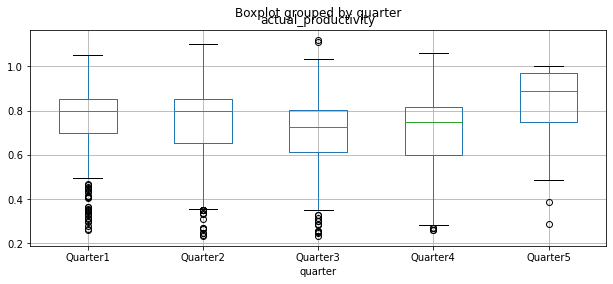

In [88]:
gData.boxplot(column='actual_productivity', by='quarter', figsize=(10,4))

<AxesSubplot:title={'center':'actual_productivity'}, xlabel='department'>

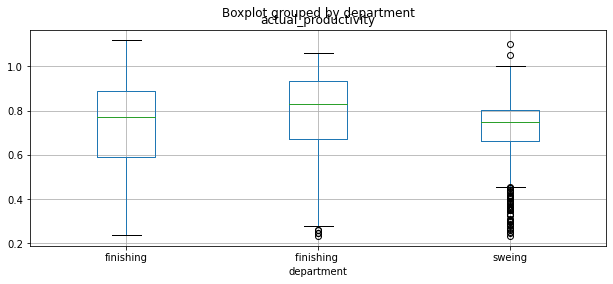

In [89]:
gData.boxplot(column='actual_productivity', by='department', figsize=(10,4))

In [90]:
from scipy.stats import f_oneway
def FunctionAnova(inputData, targetVar, categoricalPredictors):
    
    for i in categoricalPredictors:
        CategoryGroupList= inputData.groupby(i)[targetVar].apply(list)
        AnovaResults = f_oneway(*CategoryGroupList)
        print('P-Value for Anova of',i,' type is: ', AnovaResults[1])
    
FunctionAnova(inputData=gData, targetVar='actual_productivity', categoricalPredictors=['quarter','department','day','team','no_of_style_change'])

P-Value for Anova of quarter  type is:  1.170397659389911e-05
P-Value for Anova of department  type is:  6.311664125044758e-06
P-Value for Anova of day  type is:  0.614378842438619
P-Value for Anova of team  type is:  5.164908070183416e-18
P-Value for Anova of no_of_style_change  type is:  7.091638682600329e-16


In [91]:
gData.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [92]:
MedianWeight=gData['wip'].median()
gData['wip']=gData['wip'].fillna(value=MedianWeight)

In [93]:
gData.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [96]:
gDataNum=gData.drop(['date'], axis='columns', inplace=False)

In [97]:
gDataNum.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [98]:
gDataNume=pd.get_dummies(gDataNum)
gDataNume.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,...,0,0,1,0,0,0,0,1,0,0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,1,0,0,0,1,0,0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,1,0,0,0,1,0,0


In [99]:
gDataNume.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_finishing ', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

## ML

In [100]:
TargetVariable='actual_productivity'
Predictors=['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
        'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_finishing ', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday']
X=gDataNume[Predictors].values
y=gDataNume[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(897, 18)
(897,)
(300, 18)
(300,)


## mlr

In [61]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

LinearRegression()
R2 Value: 0.3275642326804177
Accuracy on Test Data: 80.58797091890969


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity
0,1.0,0.6,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,1.0
1,6.0,0.8,11.41,4380.0,50.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800359,1.0
2,8.0,0.8,2.90,1440.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.681061,1.0
3,2.0,0.7,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,1.0
4,7.0,0.8,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667604,1.0


In [62]:
TestingDataResults['APE']= np.abs((y_test - prediction) / y_test) * 100

# Printing the top 10 errors made by the model
TestingDataResults.sort_values(by='APE', ascending=False).head(10)

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,...,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity,APE
284,9.0,0.80,3.94,960.0,0.0,0.0,0.0,0.0,8.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.238042,1.0,220.089047
206,4.0,0.75,4.15,2400.0,0.0,0.0,0.0,0.0,20.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.287042,1.0,176.548011
204,6.0,0.75,2.90,3360.0,0.0,0.0,0.0,0.0,8.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.271875,1.0,174.905188
259,6.0,0.75,2.90,3360.0,0.0,0.0,0.0,0.0,8.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.271875,1.0,159.730564
151,11.0,0.80,4.15,1260.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.313853,1.0,153.662518
170,6.0,0.60,2.90,1200.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.280333,1.0,146.824574
0,1.0,0.60,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,1.0,132.105618
3,2.0,0.70,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,1.0,129.180596
260,11.0,0.50,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.259375,1.0,119.300689
254,3.0,0.50,5.13,960.0,0.0,0.0,0.0,0.0,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.256500,1.0,119.122579


## Decision Tree

DecisionTreeRegressor(max_depth=9)
R2 Value: 0.8196376059341807
Accuracy 83.4384787075953


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity
0,1.0,0.6,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,0.548962
1,6.0,0.8,11.41,4380.0,50.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800359,0.803348
2,8.0,0.8,2.90,1440.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.681061,0.674656
3,2.0,0.7,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,0.598627
4,7.0,0.8,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667604,0.616267


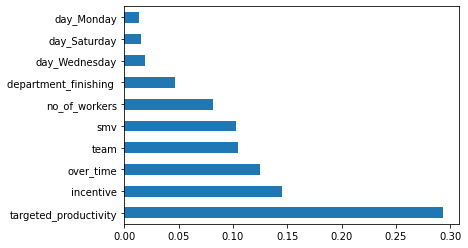

In [63]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=9,criterion='mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.abs(prediction)
TestingDataResults.head()

## Random forest

RandomForestRegressor(max_depth=9, n_estimators=160)
R2 Value: 0.8289095941122175
Accuracy 86.21301926257149


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity
0,1.0,0.6,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,0.484200
1,6.0,0.8,11.41,4380.0,50.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800359,0.798196
2,8.0,0.8,2.90,1440.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.681061,0.665827
3,2.0,0.7,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,0.642185
4,7.0,0.8,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667604,0.627388


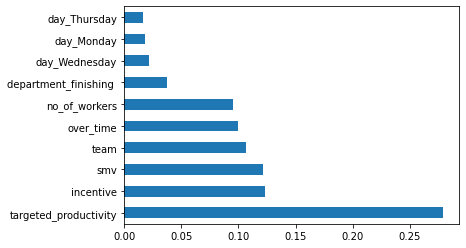

In [64]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=9, n_estimators=160,criterion='mse')

# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.abs(prediction)
TestingDataResults.head()

## adaboost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=200)
R2 Value: 0.9652342593488927
Accuracy 86.14532506405043


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity
0,1.0,0.6,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,0.566673
1,6.0,0.8,11.41,4380.0,50.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800359,0.800251
2,8.0,0.8,2.90,1440.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.681061,0.661288
3,2.0,0.7,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,0.698640
4,7.0,0.8,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667604,0.622500


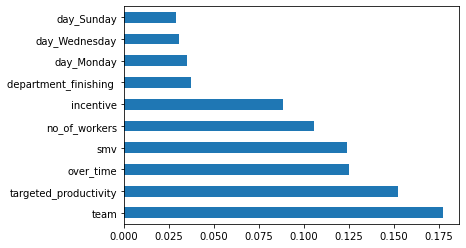

In [65]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=200, base_estimator=DTR ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.abs(prediction)
TestingDataResults.head()

## XGboost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=6,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[01:53:17] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9443468481399119
Accuracy 85.60230880223766


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity
0,1.0,0.6,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,0.475268
1,6.0,0.8,11.41,4380.0,50.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800359,0.799486
2,8.0,0.8,2.90,1440.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.681061,0.676479
3,2.0,0.7,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,0.661254
4,7.0,0.8,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667604,0.553308


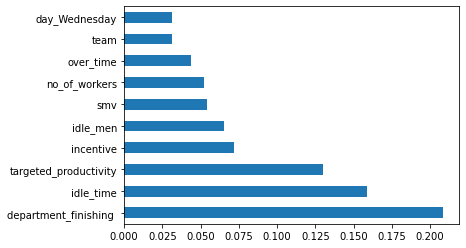

In [66]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=200, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.abs(prediction)
TestingDataResults.head()

## knn

In [67]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.abs(prediction)
TestingDataResults.head()

KNeighborsRegressor(n_neighbors=4)
R2 Value: 0.5332352941501854
Accuracy 81.21443674610873


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity
0,1.0,0.6,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,0.756994
1,6.0,0.8,11.41,4380.0,50.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800359,0.793089
2,8.0,0.8,2.90,1440.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.681061,0.648381
3,2.0,0.7,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,0.654673
4,7.0,0.8,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667604,0.613984


## svm

In [68]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=4000, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.abs(prediction)
TestingDataResults.head()

SVR(C=4000, degree=20, gamma=0.01)
R2 Value: 0.7737173314678177
Accuracy 78.66003044995452


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity,Predictedactual_productivity
0,1.0,0.6,22.53,5040.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268214,0.734353
1,6.0,0.8,11.41,4380.0,50.0,0.0,0.0,0.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800359,0.733720
2,8.0,0.8,2.90,1440.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.681061,0.657372
3,2.0,0.7,3.90,960.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.325000,0.841614
4,7.0,0.8,2.90,960.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.667604,0.732838


## Adaboost with 87 accuracy and 96 fit with almost all variable